-----------------------
#### Application of vector similarity measures
-------------------------

In [1]:
import numpy as np
import pandas as pd

from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import re

from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# import plotting libraries
from mpl_toolkits.mplot3d.axes3d import Axes3D

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.preprocessing import normalize

#### what is Cosine Similarity

- Intuitively, let’s say we have 2 vectors, each representing a sentence. If the vectors are close to parallel, maybe we assume that both sentences are “similar” in theme. Whereas if the vectors are orthogonal, then we assume the sentences are independent or NOT “similar”. 

$$ \mbox{Cosine Similarity} = \frac{\sum_{i=1}^{n}{x_{i} y_{i}}}
           {\sqrt{\sum_{i=1}^{n}{x_{i}^{2}}}
            \sqrt{\sum_{i=1}^{n}{y_{i}^{2}}}}$$
            
$$ \mbox{Cosine Distance} = 1 - \mbox{Cosine Similarity} $$ 

The resulting similarity ranges from 

- −1 meaning exactly opposite, 
-  1 meaning exactly the same, 
-  0 indicating orthogonality or decorrelation, 
- while in-between values indicate intermediate similarity or dissimilarity.

#### Applications
- In practice, cosine similarity tends to be useful when trying to determine how similar two texts/documents are. 

- used for sentiment analysis, translation, for detecting plagiarism. 

- Cosine similarity works in these usecases because we ignore magnitude and focus solely on orientation. when the magnitude of the vectors does not matter. 

- In NLP, this might help us still detect that a much longer document has the same “theme” as a much shorter document since we don’t worry about the magnitude or the “length” of the documents themselves.

- For __text matching__, the attribute vectors A and B are usually the term frequency vectors of the documents. Cosine similarity can be seen as a method of normalizing document length during comparison.

- In the case of __information retrieval__, the cosine similarity of two documents will range from 0 to 1, since the term frequencies (using tf–idf weights) cannot be negative. The angle between two term frequency vectors cannot be greater than 90°.

In [2]:
# vectors
a = np.array([1,  2,  3])
b = np.array([10, 10, 40])

In [3]:
# method - 1 - using scipy
distance.cosine(a, b)

0.05508881747693195

In [4]:
# method - 2 - using numpy
# manually compute cosine similarity
dot = np.dot(a, b)
norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
cos = dot / (norma * normb)

print("Cosine similarity is {}".format(cos))
print("Cosine distance   is {}".format(1-cos))

Cosine similarity is 0.944911182523068
Cosine distance   is 0.05508881747693195


In [5]:
# Method 3
# define own cosine function
def compute_cosine(a, b):
    result_num = np.dot(a, b)
    result_den = np.sqrt(np.sum(a **2)) * np.sqrt(np.sum(b ** 2))
    
    return result_num / result_den

cos = compute_cosine(a, b)

print("Cosine similarity is {}".format(cos))
print("Cosine distance   is {}".format(1-cos))

Cosine similarity is 0.944911182523068
Cosine distance   is 0.05508881747693195


#### When to use the cosine similarity?

In [6]:
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


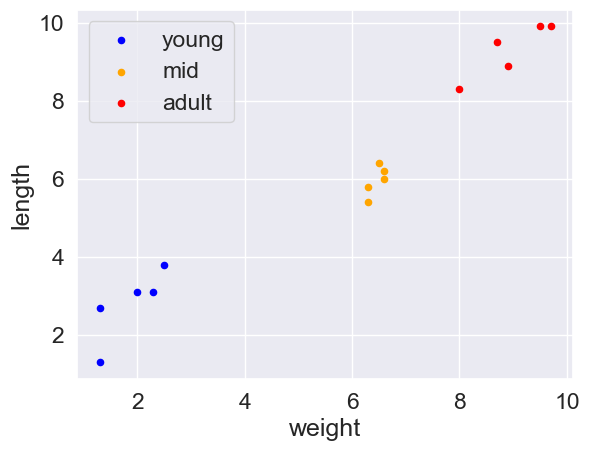

In [7]:
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue',   label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid',   ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red',    label='adult', ax=ax)

ax;

Looking at the plot above, we can see that the 3 classes are pretty well distinguishable by these 2 features that we have. 

Say that we apply k-NN to our data that will learn to classify new instances based on their distance to our known instances (and their labels). 

The algorithm needs a distance metric to determine which of the known instances are closest to the new one. 

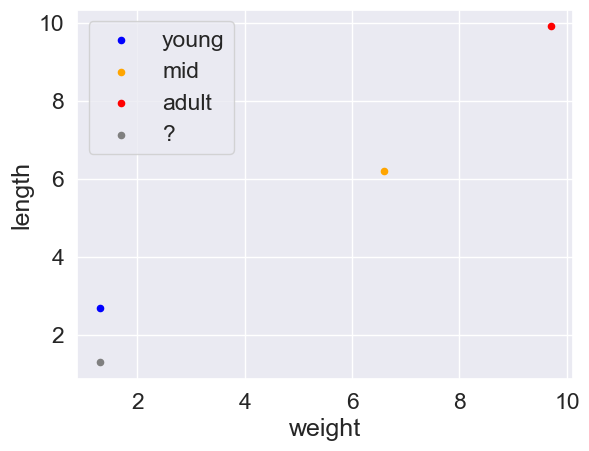

In [8]:
# Considering instance #0, #1, and #4 to be our known instances, we assume that we don’t know 
# the label of #14. 
# Plotting this will look as follows:

df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue',   label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid',   ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red',    label='adult', ax=ax)

ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)

#### Euclidean
Our euclidean distance function can be defined as follows:

$$ \Large \sqrt{\sum^n_{i=1} (x_i - y_i)^2} $$

In [9]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [10]:
X[1][:-1]

array([9.7, 9.9])

In [11]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]

x14 = X[14][:-1]
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]


In [12]:
print("x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


According to euclidean distance, instance #14 is closest to #4. Our 4th instance had the label:

0 = young, which is what we would visually also deem the correct label for this instance.

In [13]:
X[4]

array([1.3, 2.7, 0. ])

#### Cosine
Our cosine similarity function can be defined as follows:

$$ \Large \frac{x \bullet y}{ \sqrt{x \bullet x} \sqrt{y \bullet y}} $$

Where x and y are two vectors

In [14]:
def fn_cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [15]:
print(" x14 and x0:", fn_cosine_similarity(x14, x0), "\n",
      "x14 and x1:",  fn_cosine_similarity(x14, x1), "\n",
      "x14 and x4:",  fn_cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174


According to cosine similarity, instance #14 is closest to #1. However, our 1st instance had the label:

2 = adult, which is definitely NOT correct!

In [16]:
X[1]

array([9.7, 9.9, 2. ])

#### So what is the deal here ??

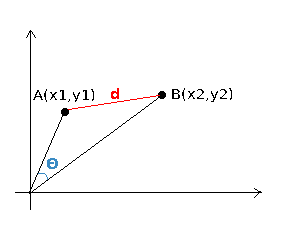

- visual representation of euclidean distance (d) and cosine similarity (θ)
- cosine looks at the angle between vectors (thus not taking into regard their weight or magnitude) 
- euclidean distance is similar to using a ruler to actually measure the distance. 

In our example the angle between x14 and x4 was larger than those of the other vectors, even though they were further away.

In [17]:
print(x0 , x1 , x4 , x14 )

[6.6 6.2] [9.7 9.9] [1.3 2.7] [1.3 1.3]


(0.0, 12.0)

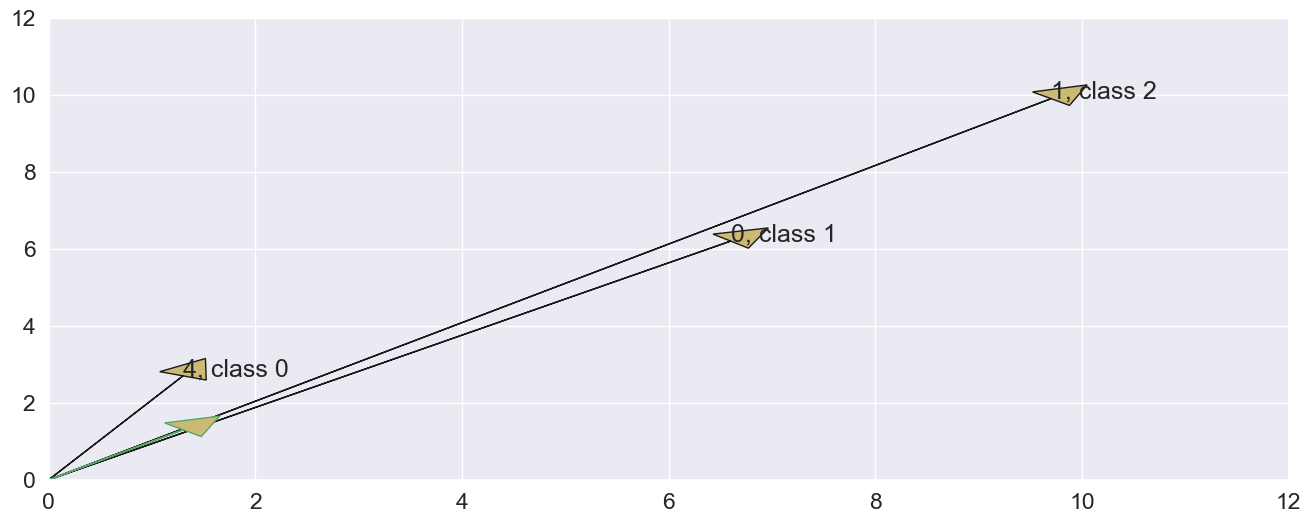

In [18]:
plt.figure(figsize=(16, 6))
plt.arrow(0, 0, x0[0], x0[1], head_width = .5,  head_length= .5, fc='y', ec='k')
plt.annotate('0, class 1 ', xy=(x0[0], x0[1]), xytext=(x0[0],x0[1]))

plt.arrow(0, 0, x1[0], x1[1], head_width = .5,  head_length= .5, fc='y', ec='k')
plt.annotate('1, class 2 ', xy=(x1[0], x1[1]), xytext=(x1[0],x1[1]))

plt.arrow(0, 0, x4[0], x4[1], head_width = .5,  head_length= .5, fc='y', ec='k')
plt.annotate('4, class 0 ', xy=(x4[0], x4[1]), xytext=(x4[0],x4[1]))

plt.arrow(0, 0, x14[0], x14[1], head_width = .5,  head_length= .5, fc='y', ec='g')

plt.xlim(0, 12)
plt.ylim(0, 12)

In [19]:
# the 3 training and 1 test points
df.iloc[[0, 1, 4, 14]]

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
4,1.3,2.7,0.0
14,1.3,1.3,0.0
